In [ ]:
!pip install lazypredict

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UROP/pIC50_dataset.csv')
df

,molecule_chembl_id,canonical_smiles,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,6.096910
...,...,...,...
6151,CHEMBL5219841,COc1cccc2c1CCCC2NS(=O)(=O)NC(=O)OCc1ccccc1,9.679854
6152,CHEMBL5219046,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1,6.562249
6153,CHEMBL5219594,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1,4.118045
6154,CHEMBL5219958,CC(C)c1ccc(COc2ccc3[nH]c(=O)oc(=O)c3c2)cc1,4.259637


In [ ]:
descriptors = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UROP/PubChem.csv')
descriptors

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL133897,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL336398,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL131588,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL130628,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL130478,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6151,CHEMBL5219841,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6152,CHEMBL5219046,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6153,CHEMBL5219594,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6154,CHEMBL5219958,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [ ]:
X = descriptors.drop('Name', axis=1)
Y = df['pIC50']

In [ ]:
#remove low variance features
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP12,PubchemFP13,PubchemFP15,PubchemFP16,PubchemFP18,PubchemFP19,...,PubchemFP758,PubchemFP761,PubchemFP776,PubchemFP777,PubchemFP797,PubchemFP798,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP824
0,1,1,1,0,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,1,1,1,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6151,1,1,1,0,1,0,1,0,1,1,...,0,0,0,0,0,1,1,1,1,0
6152,1,1,1,0,1,0,1,0,1,1,...,0,0,0,0,0,1,0,0,0,0
6153,1,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
6154,1,1,1,0,1,0,0,0,1,1,...,1,0,1,0,0,1,0,0,1,0


In [ ]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Defines and builds the lazyregressor
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = reg.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = reg.fit(X_train, X_test, Y_train, Y_test)

 98%|█████████▊| 41/42 [02:53<00:02,  2.40s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012995 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 648
[LightGBM] [Info] Number of data points in the train set: 4924, number of used features: 216
[LightGBM] [Info] Start training from score 5.821106


100%|██████████| 42/42 [02:54<00:00,  4.16s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


 98%|█████████▊| 41/42 [02:12<00:01,  1.29s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012621 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 648
[LightGBM] [Info] Number of data points in the train set: 4924, number of used features: 216
[LightGBM] [Info] Start training from score 5.821106


100%|██████████| 42/42 [02:13<00:00,  3.18s/it]


In [ ]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.96,0.96,0.30,0.43
ExtraTreeRegressor,0.96,0.96,0.30,0.28
ExtraTreesRegressor,0.96,0.96,0.30,16.85
GaussianProcessRegressor,0.96,0.96,0.30,48.06
RandomForestRegressor,0.93,0.93,0.40,12.22
MLPRegressor,0.92,0.93,0.42,17.37
XGBRegressor,0.92,0.92,0.44,2.40
BaggingRegressor,0.92,0.92,0.44,2.16
HistGradientBoostingRegressor,0.78,0.79,0.72,2.48


In [ ]:
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.65,0.72,0.84,12.73
XGBRegressor,0.64,0.70,0.86,0.86
BaggingRegressor,0.63,0.70,0.87,1.16
HistGradientBoostingRegressor,0.63,0.69,0.88,6.78
LGBMRegressor,0.62,0.69,0.88,0.82
KNeighborsRegressor,0.58,0.65,0.93,0.19
SVR,0.57,0.65,0.94,4.96
NuSVR,0.57,0.64,0.95,3.83
MLPRegressor,0.56,0.64,0.95,16.67


[(0.0, 1.0)]

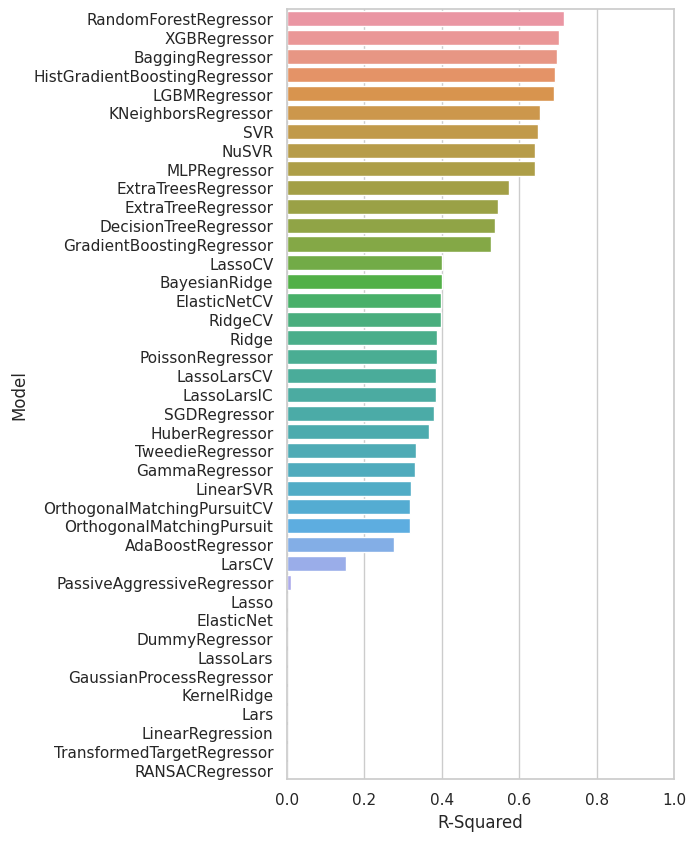

In [ ]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_test.index, x="R-Squared", data=predictions_test)
ax.set(xlim=(0, 1))

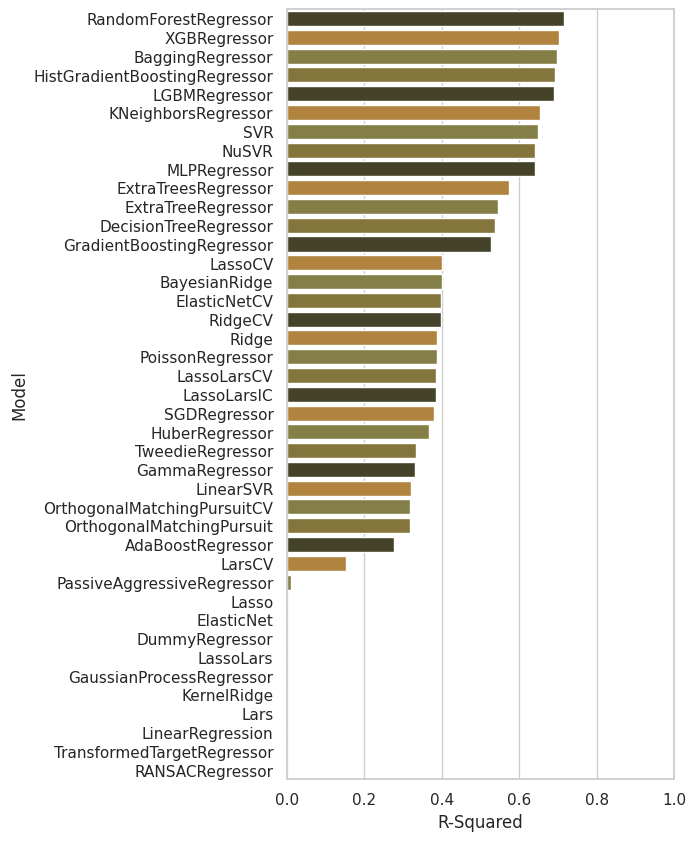

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Custom colors
custom_colors = ["#494623", "#c3892b", "#8e883d", "#8f7c2f"]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")

# Using the custom color palette in the barplot
ax = sns.barplot(y=predictions_test.index, x="R-Squared", data=predictions_test, palette=custom_colors)
ax.set(xlim=(0, 1))

plt.show()
